Created By : Shreya Dubey
Performing Testing on the generated results in order to do analysis

In [1]:
from rouge import Rouge
import pandas as pd


In [2]:
df = pd.read_csv('abstract_predicted_data.csv')

In [4]:
original = df['original']
predicted = df['abs_predicted']

In [6]:
evaluator = Rouge()
metric = []
for i in range(len(original)):
    metric.append(evaluator.get_scores(predicted[i],original[i]))

avg_ro_1_r = 0
for i in range(len(metric)):
    avg_ro_1_r = avg_ro_1_r + metric[i][0]['rouge-1']['r']

print("average recall = ",(avg_ro_1_r/len(metric))*100)

avg_ro_1_p = 0
for i in range(len(metric)):
    avg_ro_1_p = avg_ro_1_p + metric[i][0]['rouge-1']['p']
    
print("average precision = ",(avg_ro_1_p/len(metric))*100)

average recall =  6.699195343263138
average precision =  7.034195290853883


In [46]:
df_1 = pd.read_csv('extract_predicted_data.csv')

original_1 = df_1['original']
predicted_1 = df_1['ex_predicted']

In [47]:
metric_1 = []
for i in range(len(original_1)):
    metric_1.append(evaluator.get_scores(predicted_1[i],original_1[i]))

avg_ro_1_r = 0
for i in range(len(metric_1)):
    avg_ro_1_r = avg_ro_1_r + metric_1[i][0]['rouge-1']['r']

print("average recall = ",(avg_ro_1_r/len(metric_1))*100)

avg_ro_1_p = 0
for i in range(len(metric_1)):
    avg_ro_1_p = avg_ro_1_p + metric_1[i][0]['rouge-1']['p']
    
print("average precision = ",(avg_ro_1_p/len(metric_1))*100)

average recall =  32.34265512422077
average precision =  9.20409623963251


In [48]:
from statistics import mean
sent_size = []

for i in predicted_1:
    sent_size.append(len(i.split()))
    
print(mean(sent_size))

44.5494944744886


In [49]:
abs_r = []
ex_r = []
abs_p = []
ex_p = []
abs_y = []
ex_y = []
for i in range(len(metric)):
    abs_r.append(metric[i][0]['rouge-1']['r']*100)
    abs_p.append(metric[i][0]['rouge-1']['p']*100)
    abs_y.append(i)
    
for i in range(len(metric_1)):
    ex_r.append(metric_1[i][0]['rouge-1']['r']*100)
    ex_p.append(metric_1[i][0]['rouge-1']['p']*100)
    ex_y.append(i)

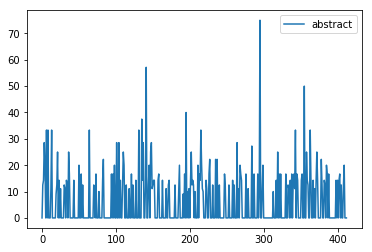

In [50]:
from matplotlib import pyplot as plt

plt.plot(abs_r,label='abstract')
plt.legend()
plt.show()


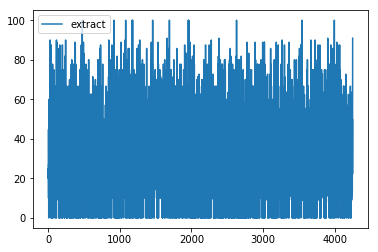

In [51]:
plt.plot(ex_r, label='extract')
plt.legend()
plt.show()

In [52]:
count_1 = 0
for i in abs_r:
    if(i>=20):
        count_1 = count_1 +1

print(count_1/len(abs_r)*100)
print(count_1)

10.895883777239709
45


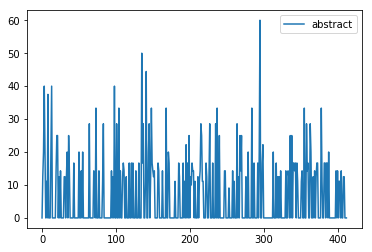

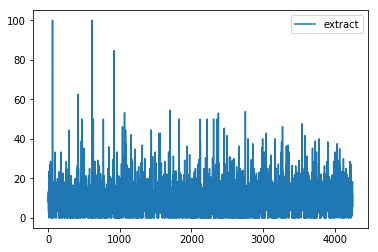

In [53]:
plt.plot(abs_p,label='abstract')
plt.legend()
plt.show()

plt.plot(ex_p, label='extract')
plt.legend()
plt.show()

In [3]:
pos_a = pd.read_csv('Positive_model_output.csv')
pos_e = pd.read_csv('Positive_model_output_ex.csv')
neg_a = pd.read_csv('Negative_model_output_abs.csv')
neg_e = pd.read_csv('Negative_model_output_ex.csv')

In [14]:
neg_a.head()

,original,neg_predicted
0,whatsapp claims bike waiting of,claims the waiting of the the of the the the
1,delhi metro to get machines for transactions,delhi metro to get machines for the the the th...
2,sushant of srk of srk on aamir on aamir,an of a of a on aamir on aamir khan khan a a a...
3,delhi govt to revamp,delhi militants to a the the the the the the t...
4,china to feature in india,a to feature in india the of the the the the t...


In [15]:
o = neg_a['original']
p = neg_a['neg_predicted']

In [7]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\khare\AppData\Roaming\nltk_data...


In [20]:
sid = SentimentIntensityAnalyzer()

for i in range(400,410):
    print("original = ",o[i])
    print("Sentiment = ",sid.polarity_scores(o[i]))
    print("original = ",p[i])
    print("Sentiment = ",sid.polarity_scores(p[i]))
    print('\n')

original =  actor scene to be father kapoor
Sentiment =  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
original =  actor heading to be father kapoor which to the the the the the the the the the the of
Sentiment =  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


original =  samsung teacher suspended for selling donald trump
Sentiment =  {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}
original =  samsung barrels suspended for selling donald trump to the to to to to the the the the to
Sentiment =  {'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'compound': -0.4767}


original =  where is to make review of new rss ceo
Sentiment =  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
original =  where is to make of new dap ceo the the the the the the the of of of
Sentiment =  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


original =  govt to be indias biggest hub jets of months
Sentiment =  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
original =  a 